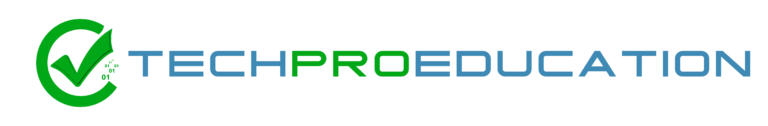

# Classification

<span class="girk">We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.</span>

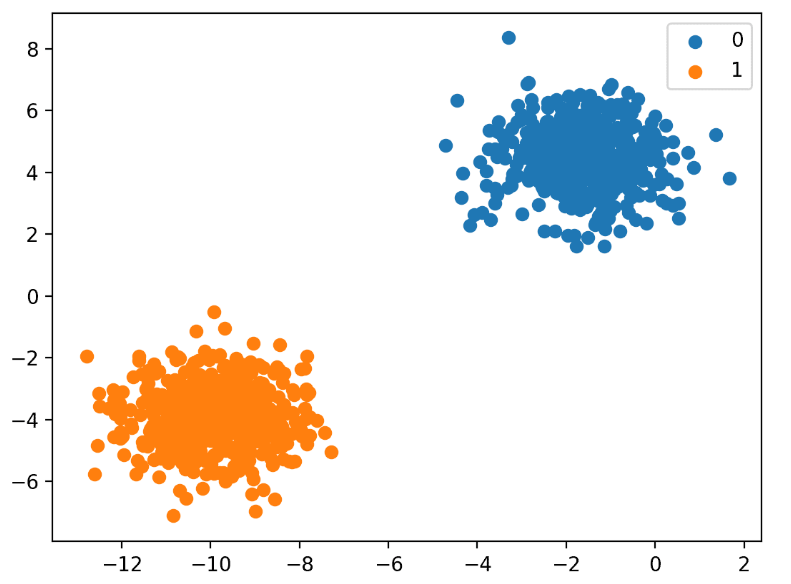

## Import  libraries & data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# all the related libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

**Churn** is a term typically related to customer bases and refers to how frequently businesses lose their customers or clients. Churn indicates a customer's departure or cancellation of services from a service provider or business. It can also be referred to as "customer loss" or "customer turnover."

The **churn rate** shows how many customers have left a business over a specific period (usually monthly or annually). This rate is important for businesses because acquiring new customers is often more costly than retaining existing ones. If the churn rate is high, the business should develop strategies to increase customer loyalty and reduce customer loss.

Reducing or controlling customer churn is a critical factor for the long-term success of businesses. By using data analytics and machine learning, businesses can predict customer churn, understand customer behavior, and develop strategies to enhance customer loyalty.

Churn analysis is a significant concept used in various sectors, including telecommunications, banking, insurance, e-commerce, and service industries. Churn data can help businesses understand customer behavior and adjust their business strategies accordingly.

In [3]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
#"RowNumber" sütunu indeks olarak belirleniyor

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


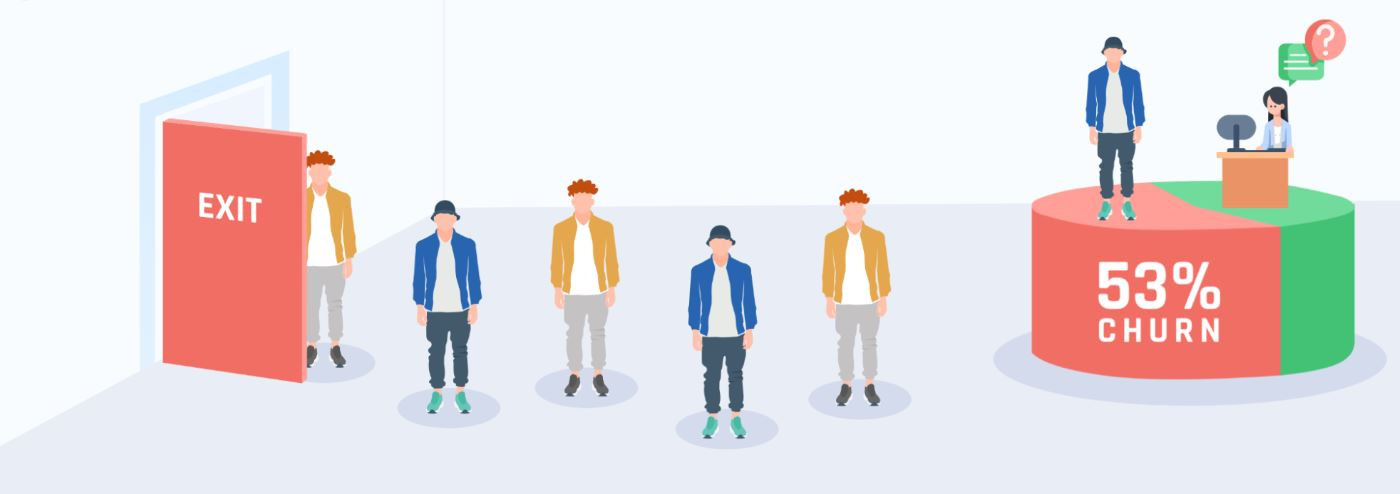

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 13)

In [6]:
df.isnull().sum().any()

False

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [9]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

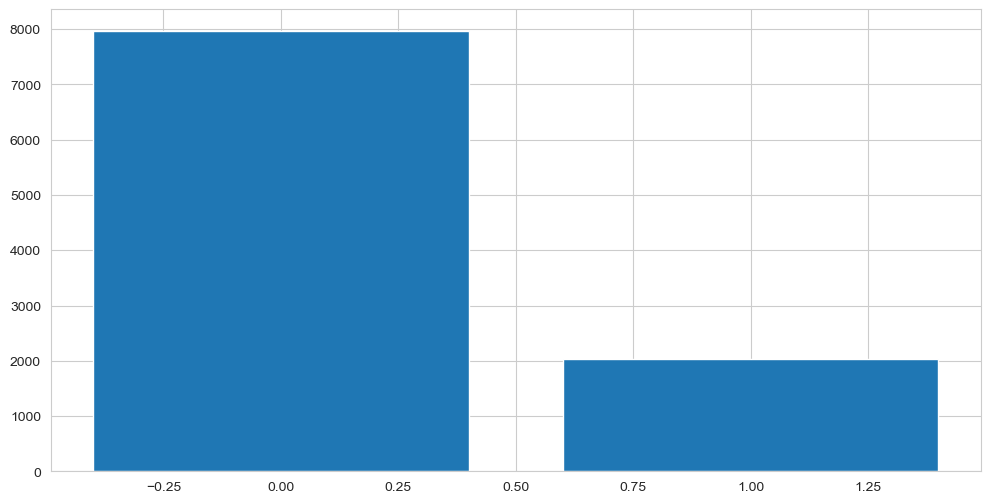

In [11]:
value_counts = df['Exited'].value_counts()

plt.bar(value_counts.index, value_counts.values);

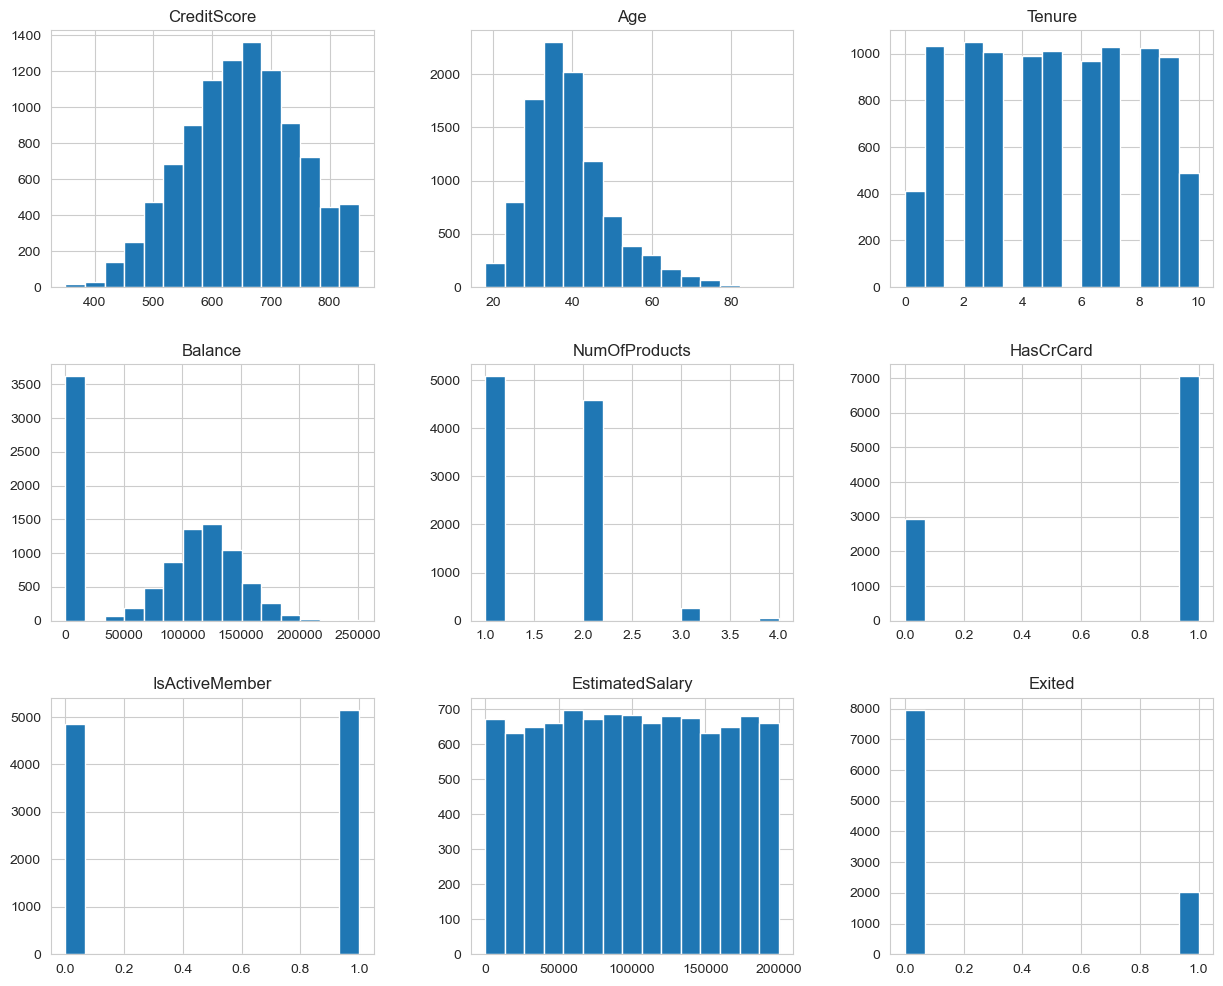

In [12]:
df.hist(figsize=(15, 12), bins=15);

<Axes: >

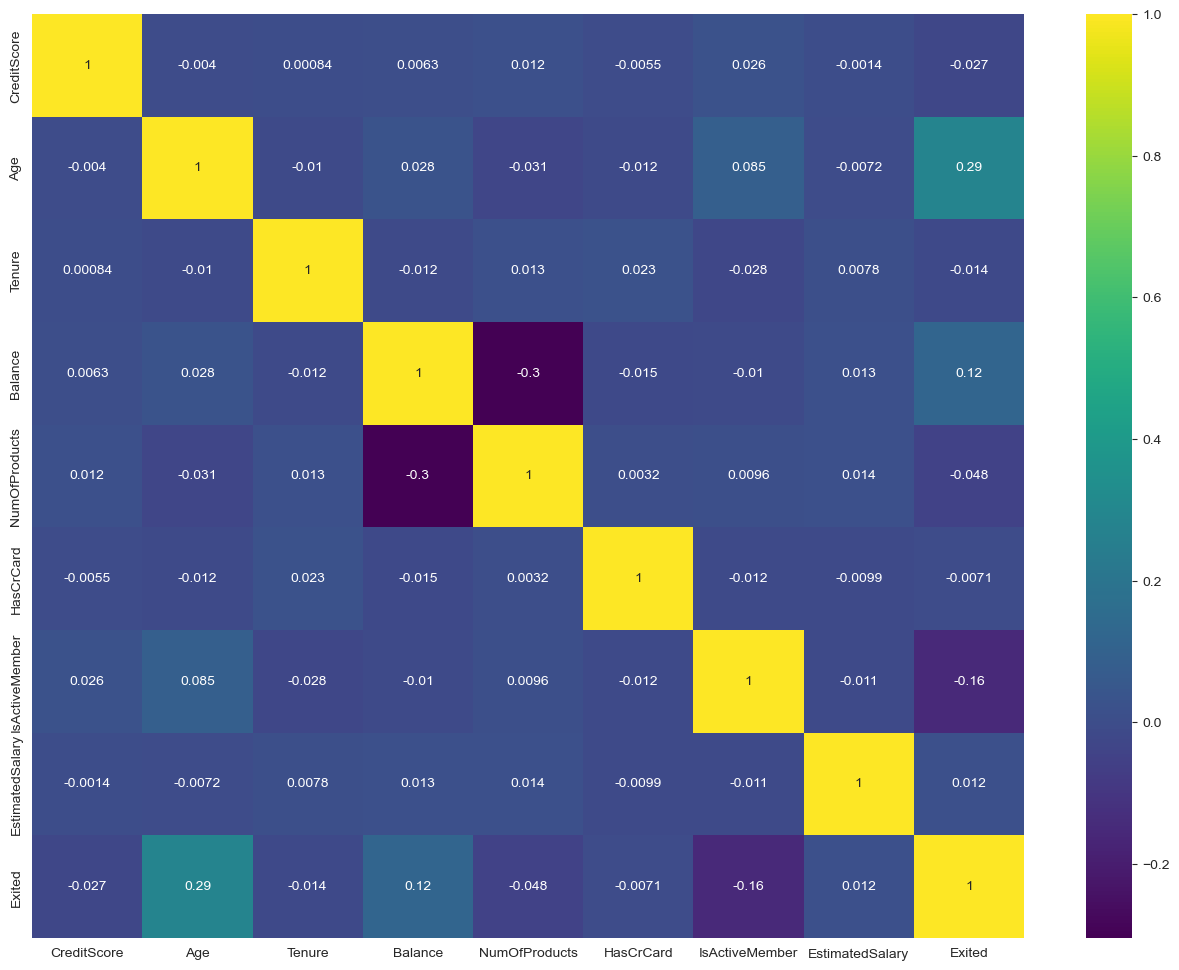

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot=True, cmap='viridis')

In [14]:
# If there is an error in the code above, run the code below.

<Axes: >

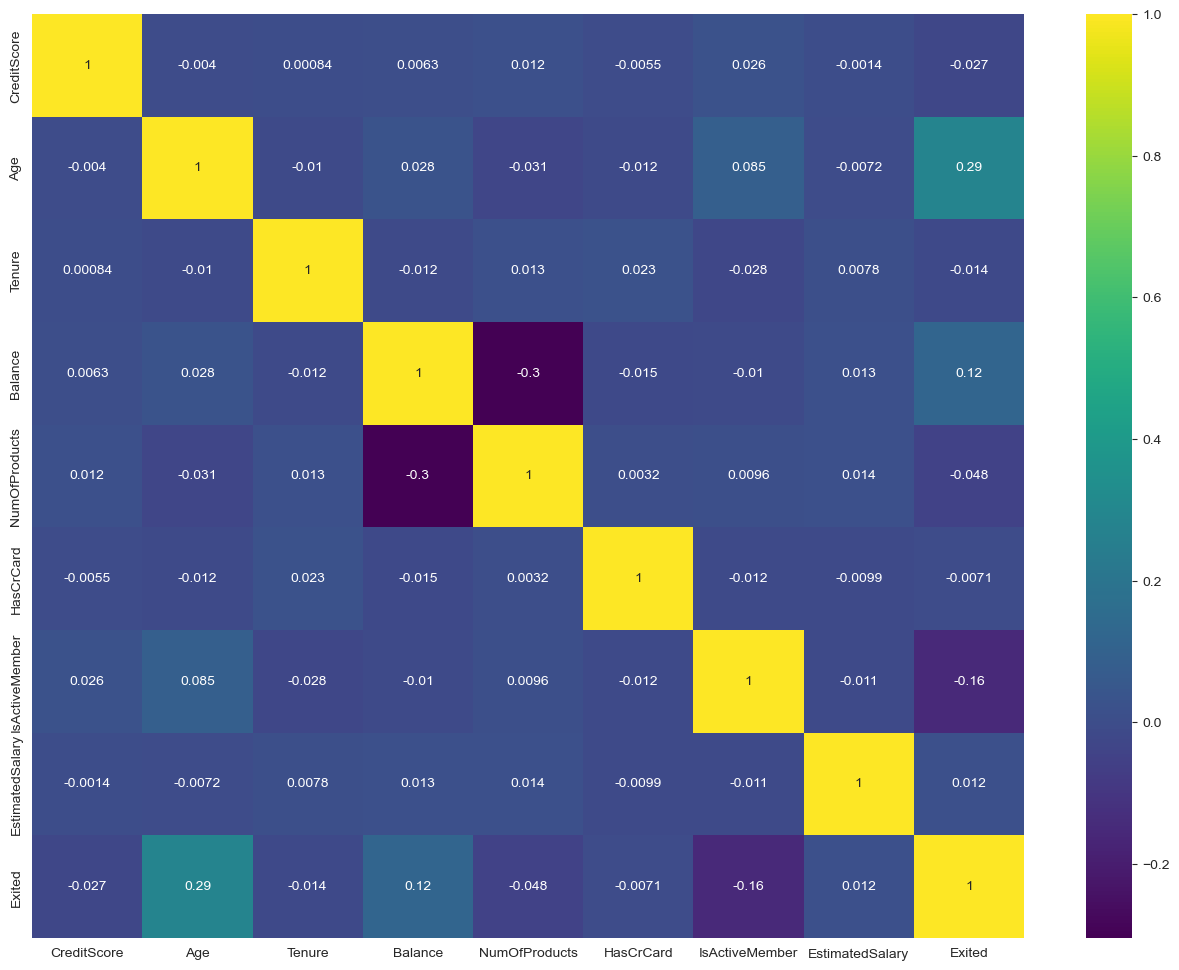

In [15]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')

<Axes: >

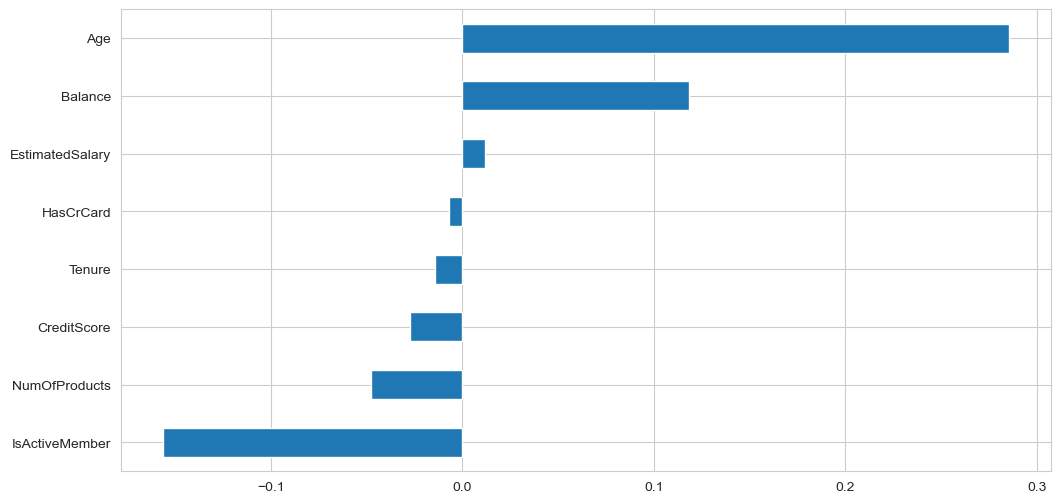

In [16]:
df.select_dtypes(include = 'number').corr()['Exited'][:-1].sort_values().plot.barh()

In [17]:
# If the code above encounters an error, those who experience it should run the code below.

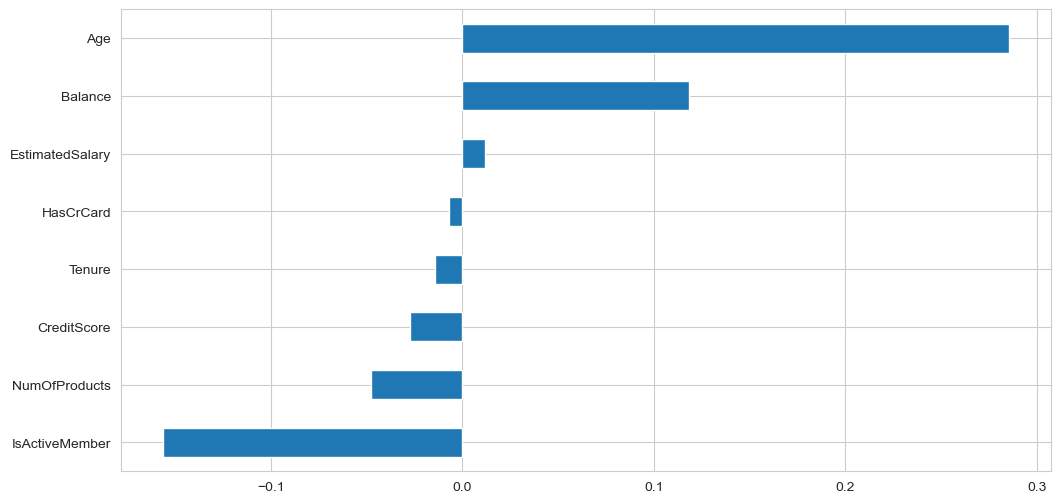

In [18]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_series = numerical_df.corr()['Exited'][:-1].sort_values()
correlation_series.plot.barh();

In [19]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,False,False,False
2,608,41,1,83807.860,1,0,1,112542.580,0,False,True,False
3,502,42,8,159660.800,3,1,0,113931.570,1,False,False,False
4,699,39,1,0.000,2,0,0,93826.630,0,False,False,False
5,850,43,2,125510.820,1,1,1,79084.100,0,False,True,False


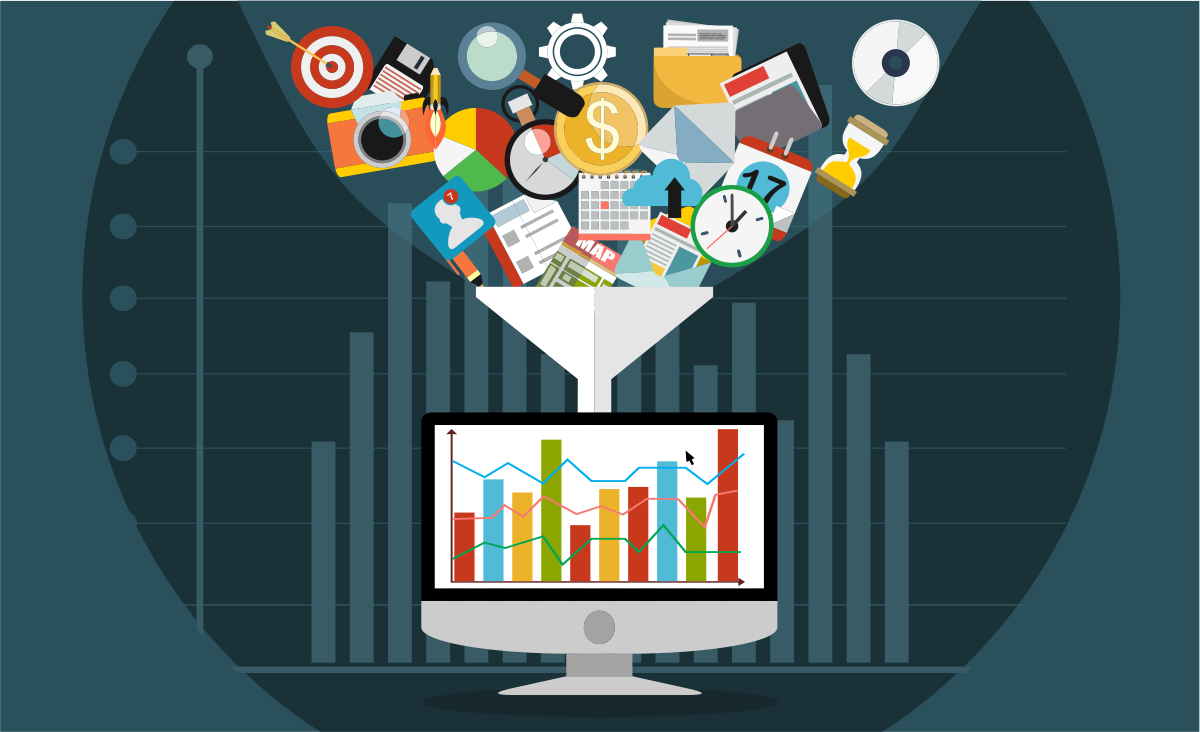

## Preprocessing of Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

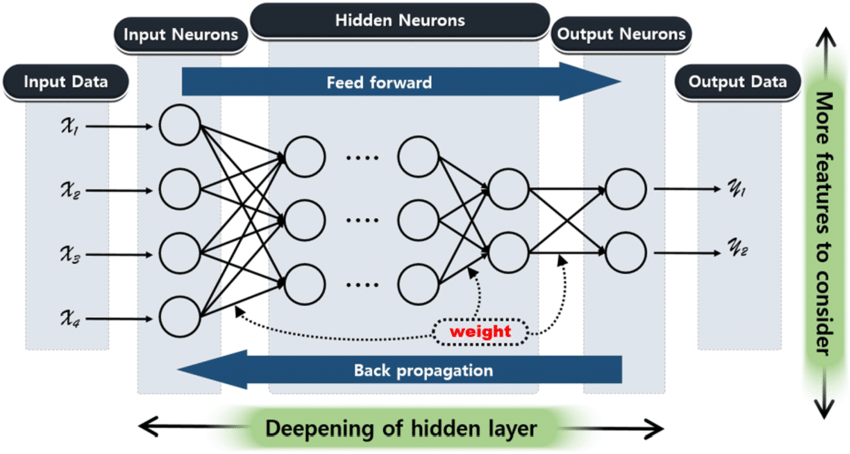

## Modelling & Model Performance

### without class_weigth

In [24]:
X_train.shape

(9000, 11)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [26]:
from tensorflow.keras.optimizers import Adam

In [27]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# Recall — the percentage of positive cases you caught
# Recall is an important metric when false negatives cannot be ignored. recall = TP / (TP + FN)
# The reason we look at recall is entirely due to the false negatives in the denominator, which are the individuals predicted to continue their account but actually close it.


In [28]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [29]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Recall: 0.2568 - loss: 0.5548 - val_Recall: 0.0884 - val_loss: 0.4075
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.3250 - loss: 0.3939 - val_Recall: 0.5249 - val_loss: 0.3348
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4243 - loss: 0.3641 - val_Recall: 0.5691 - val_loss: 0.3199
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.3928 - loss: 0.3684 - val_Recall: 0.5193 - val_loss: 0.3062
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.3324 - loss: 0.3883 - val_Recall: 0.5912 - val_loss: 0.3025
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.3948 - loss: 0.3673 - val_Recall: 0.5525 - val_loss: 0.3007
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4255 - loss: 0.3593 - val_Recall: 0.5193 - val_loss: 0.3070
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4041 - loss: 0.3563 - val_Recall: 0.6575 - val_loss: 0.3116


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4834 - loss: 0.3268 - val_Recall: 0.5856 - val_loss: 0.2964
Epoch 53/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.4864 - loss: 0.3343 - val_Recall: 0.5691 - val_loss: 0.3030
Epoch 54/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.4421 - loss: 0.3397 - val_Recall: 0.6077 - val_loss: 0.2978
Epoch 55/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.4907 - loss: 0.3386 - val_Recall: 0.4972 - val_loss: 0.3000
Epoch 56/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.4546 - loss: 0.3351 - val_Recall: 0.5083 - val_loss: 0.2989
Epoch 57/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4602 - loss: 0.3279 - val_Recall: 0.5138 - val_loss: 0.2957
Epoch 58/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4720 - loss: 0.3293 - val_Recall: 0.5525 - val_loss: 0.2952
Epoch 59/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4794 - loss: 0.3156 - val_Recall: 0.5912 - val_loss: 0.2944
Epoch

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5074 - loss: 0.3136 - val_Recall: 0.4862 - val_loss: 0.3085
Epoch 104/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5211 - loss: 0.3108 - val_Recall: 0.5249 - val_loss: 0.3008
Epoch 105/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5030 - loss: 0.3239 - val_Recall: 0.5746 - val_loss: 0.3022
Epoch 106/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.5178 - loss: 0.3154 - val_Recall: 0.5414 - val_loss: 0.3119
Epoch 107/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5031 - loss: 0.3108 - val_Recall: 0.5912 - val_loss: 0.3062
Epoch 108/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5168 - loss: 0.3162 - val_Recall: 0.5525 - val_loss: 0.3187
Epoch 109/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5237 - loss: 0.3058 - val_Recall: 0.5967 - val_loss: 0.3019
Epoch 110/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5338 - loss: 0.3100 - val_Recall: 0.5635 - val_loss: 0.303

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,341 (48.21 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 240 (960.00 B)

 Optimizer params: 8,068 (31.52 KB)

In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,Recall,loss,val_Recall,val_loss
0,0.217,0.475,0.088,0.408
1,0.350,0.396,0.525,0.335
2,0.384,0.376,0.569,0.320
3,0.394,0.378,0.519,0.306
4,0.375,0.378,0.591,0.303


<Axes: >

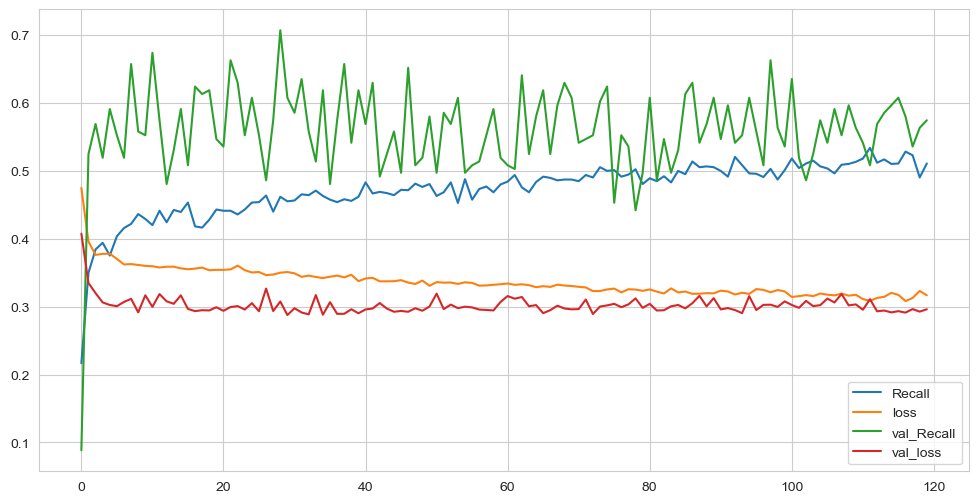

In [32]:
loss_df.plot()

In [33]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[756  40]
 [101 103]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.50      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.73      0.75      1000
weighted avg       0.85      0.86      0.85      1000



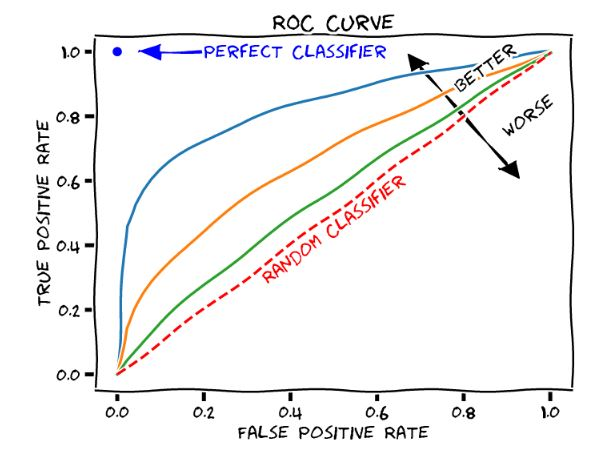

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


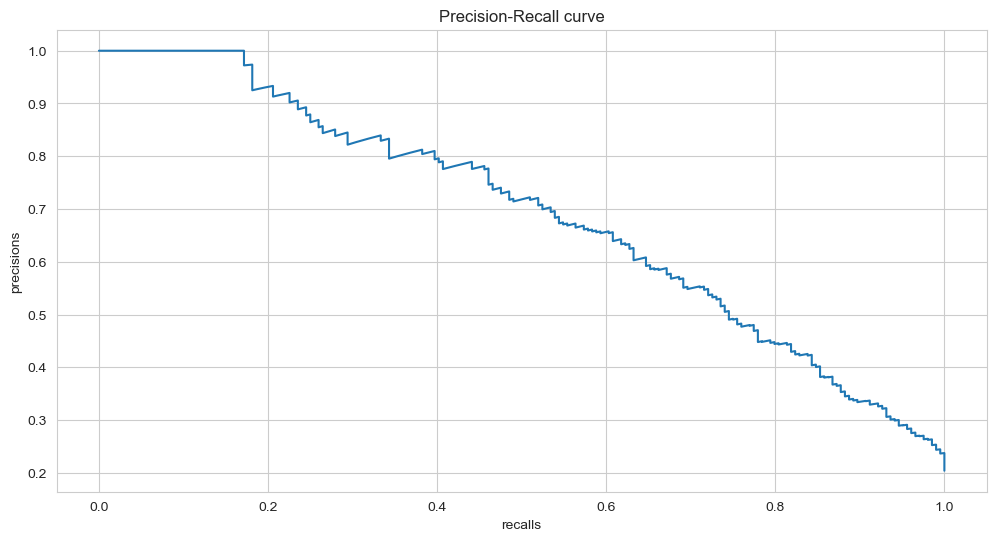

In [34]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, shows the classification performance

In [35]:
average_precision_score(y_test, y_pred_proba)

0.6918272555143051

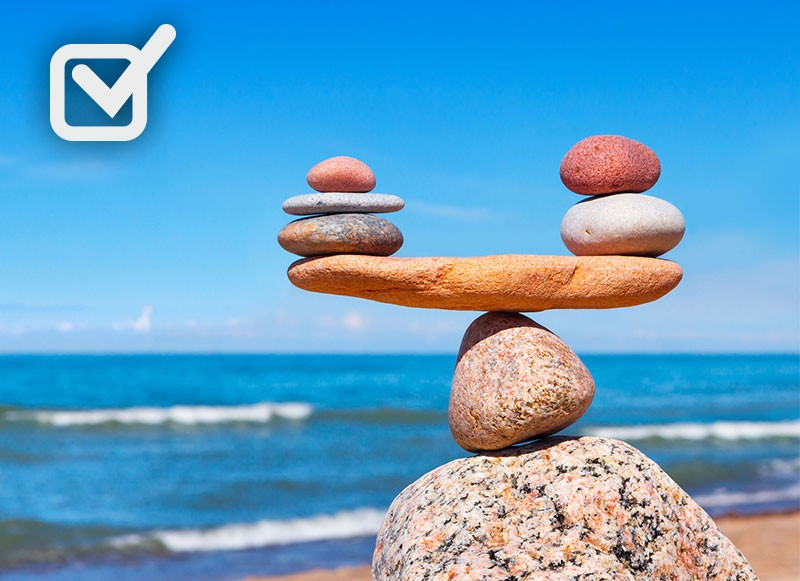

### with class_weigth

In [36]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

This code snippet applies the weighting (class weighting) method used to address the imbalance between classes in imbalanced data classification problems. Specifically, it calculates class weights using the `class_weight.compute_class_weight` function and attempts to tackle class imbalance by utilizing these weights.

In [37]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

1. `class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)`: The `'balanced'` parameter ensures that class weights are calculated in a balanced manner. The `classes` parameter should be an array or list containing the unique class labels present in the training dataset. The `y` parameter should be an array or list containing the example labels from the training dataset. This function returns the class weights.

2. `class_weights = {0: class_weights[0], 1: class_weights[1]}`: This line assigns the calculated class weights to a dictionary. This is particularly applicable when you have a binary classification problem with class labels 0 and 1.

This output shows the result of calculating class weights. Class weights allow the model to learn better on underrepresented classes by assigning higher weights to those classes.

Class weights are (0: 0.6278777731268314, 1: 2.454991816693944)

if calculated:

Weight for Class O: 0.6278777731268314

Weight for Class 1: 2.454991816693944

These results show that class 1 is a less represented class with fewer examples. Therefore, a higher weight was assigned to class 1, which would give more emphasis during model training.

When used in model training, class weights can help correct for misclassifications and model performance due to class imbalance.

In [38]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Recall: 0.6917 - loss: 0.7000 - val_Recall: 0.6575 - val_loss: 0.5809
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7180 - loss: 0.5786 - val_Recall: 0.7238 - val_loss: 0.4777
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7213 - loss: 0.5452 - val_Recall: 0.8508 - val_loss: 0.4920
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7327 - loss: 0.5237 - val_Recall: 0.8122 - val_loss: 0.4671
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7308 - loss: 0.5201 - val_Recall: 0.8122 - val_loss: 0.4419
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7127 - loss: 0.5235 - val_Recall: 0.7680 - val_loss: 0.4127
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7327 - loss: 0.4879 - val_Recall: 0.8564 - val_loss: 0.4871
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7375 - loss: 0.4946 - val_Recall: 0.7901 - val_loss: 0.4046


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7923 - loss: 0.4374 - val_Recall: 0.7845 - val_loss: 0.4137
Epoch 53/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7896 - loss: 0.4287 - val_Recall: 0.7956 - val_loss: 0.4593
Epoch 54/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8073 - loss: 0.4321 - val_Recall: 0.8232 - val_loss: 0.4671
Epoch 55/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8009 - loss: 0.4394 - val_Recall: 0.7790 - val_loss: 0.4039
Epoch 56/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8069 - loss: 0.4107 - val_Recall: 0.8122 - val_loss: 0.4378
Epoch 57/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7761 - loss: 0.4366 - val_Recall: 0.8287 - val_loss: 0.4643
Epoch 58/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7984 - loss: 0.4342 - val_Recall: 0.8066 - val_loss: 0.4268
Epoch 59/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7854 - loss: 0.4241 - val_Recall: 0.7845 - val_loss: 0.4333
Epoch

<Axes: >

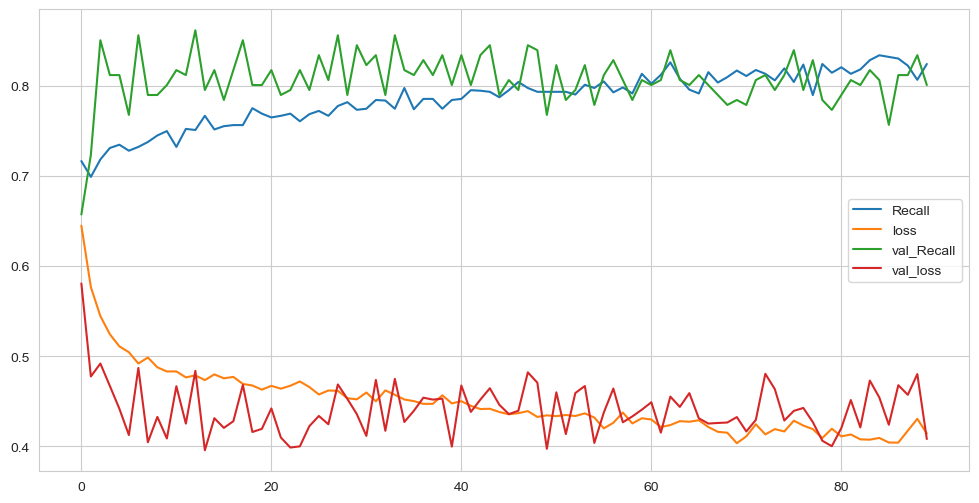

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[625 171]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.47      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



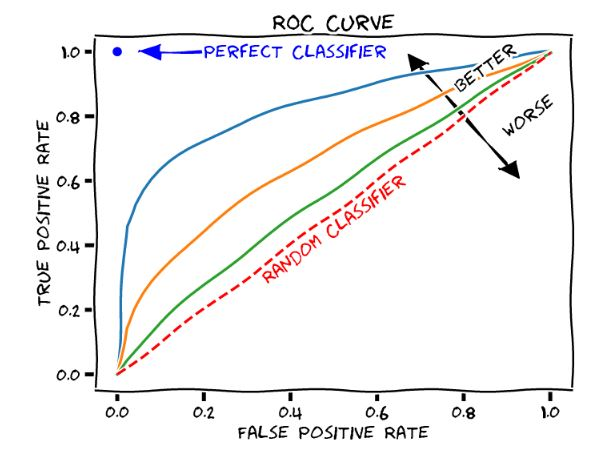

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


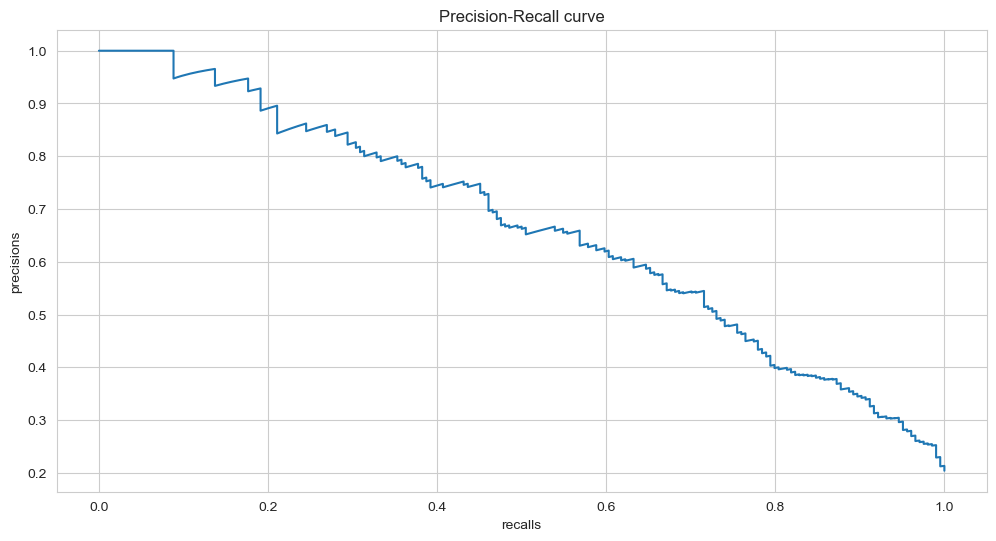

In [41]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, shows the performance of classification

In [42]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.6672711196496894

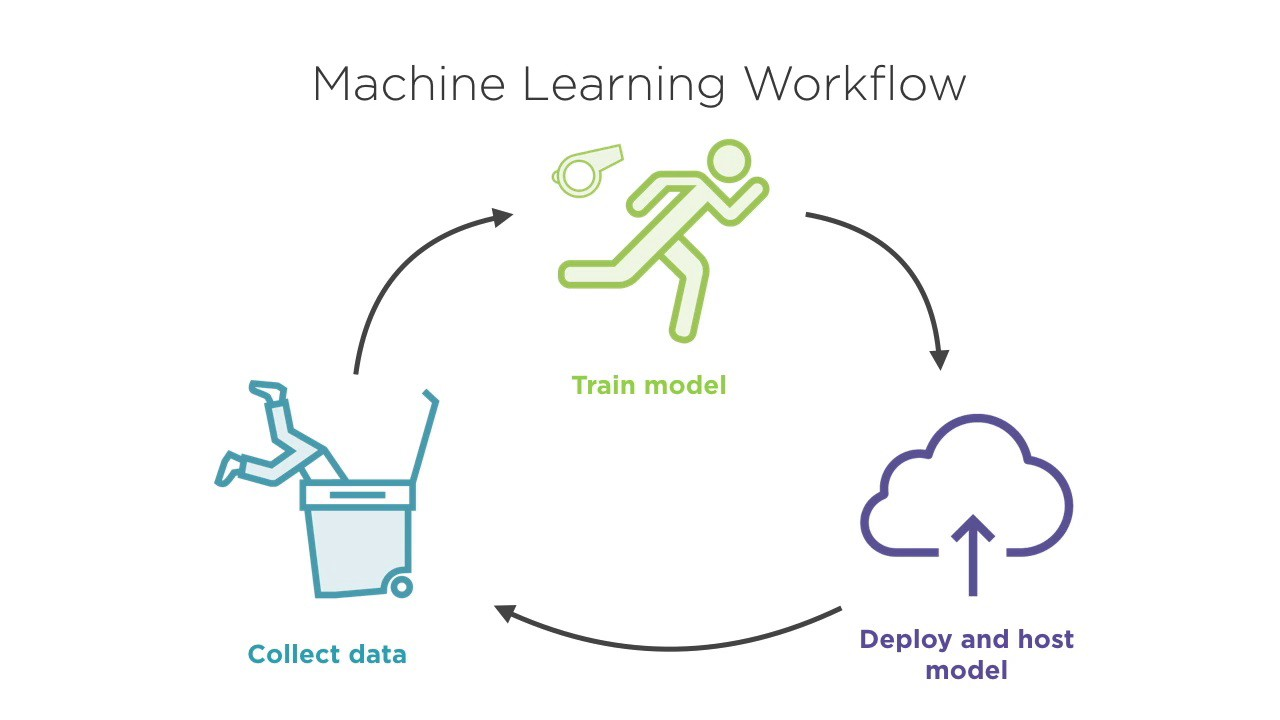

## Final Model and Model Deployment

In [43]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

This code snippet saves a data scaler object created during data preprocessing to a file via the pickle module. This way, you can use the scaler for future reuse or to scale new data after training the model.

pickle.dump(scaler, open("scaler_churn", 'wb'))  # This line saves the 'scaler' object to a file named "scaler_churn".

- pickle.dump(): This function is used to save an object to a file.

- scaler: The object to be saved, which should be a data scaler (e.g., 'StandardScaler').

- open("scaler_churn", 'wb'): Indicates that the file named "scaler_churn" will be opened in write mode ('wb').

    - 'w': Represents write mode.

    - 'b': Represents binary mode. Pickle files are typically saved in binary mode.

With this line of code, you can save the data scaler object you created to disk. After training the model, you can reload this scaler to scale new data.


In [44]:
scaler = MinMaxScaler().fit(X)

In [45]:
X_scaled = scaler.transform(X)

In [46]:
model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())  
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [47]:
model.fit(x=X_scaled,
          y=y,
          callbacks=[early_stop],
          batch_size=32,
          validation_split = 0.1,
          epochs=500,
          verbose=1,
          class_weight=class_weights)   

Epoch 1/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Recall: 0.5598 - loss: 0.7050 - val_Recall: 0.3966 - val_loss: 0.5992
Epoch 2/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.6267 - loss: 0.6125 - val_Recall: 0.6872 - val_loss: 0.6328
Epoch 3/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.6903 - loss: 0.5824 - val_Recall: 0.6816 - val_loss: 0.5789
Epoch 4/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7389 - loss: 0.5441 - val_Recall: 0.7039 - val_loss: 0.5882
Epoch 5/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7328 - loss: 0.5330 - val_Recall: 0.7486 - val_loss: 0.5947
Epoch 6/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7505 - loss: 0.5052 - val_Recall: 0.7263 - val_loss: 0.5710
Epoch 7/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7462 - loss: 0.5084 - val_Recall: 0.7151 - val_loss: 0.5259
Epoch 8/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7746 - loss: 0.5054 - val_Recall: 0.7039 - val_loss: 0.5116


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8115 - loss: 0.4203 - val_Recall: 0.7542 - val_loss: 0.5225
Epoch 53/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8193 - loss: 0.4258 - val_Recall: 0.7263 - val_loss: 0.5089
Epoch 54/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8145 - loss: 0.4344 - val_Recall: 0.6983 - val_loss: 0.4633
Epoch 55/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8109 - loss: 0.4210 - val_Recall: 0.7151 - val_loss: 0.4844
Epoch 56/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8044 - loss: 0.4248 - val_Recall: 0.7039 - val_loss: 0.4800
Epoch 57/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8135 - loss: 0.4290 - val_Recall: 0.6983 - val_loss: 0.4683
Epoch 58/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8081 - loss: 0.4311 - val_Recall: 0.7207 - val_loss: 0.5047
Epoch 59/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8286 - loss: 0.4189 - val_Recall: 0.7318 - val_loss: 0.4968
Epoch

<Axes: >

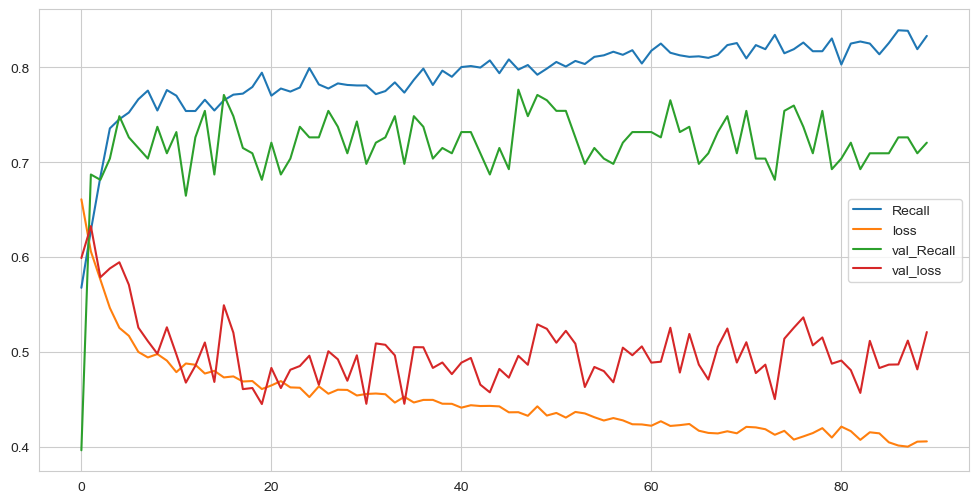

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [49]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4109176695346832
recall :  0.8627451062202454


In [50]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[614 182]
 [ 28 176]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       796
           1       0.49      0.86      0.63       204

    accuracy                           0.79      1000
   macro avg       0.72      0.82      0.74      1000
weighted avg       0.86      0.79      0.81      1000



In [51]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_churn.keras')

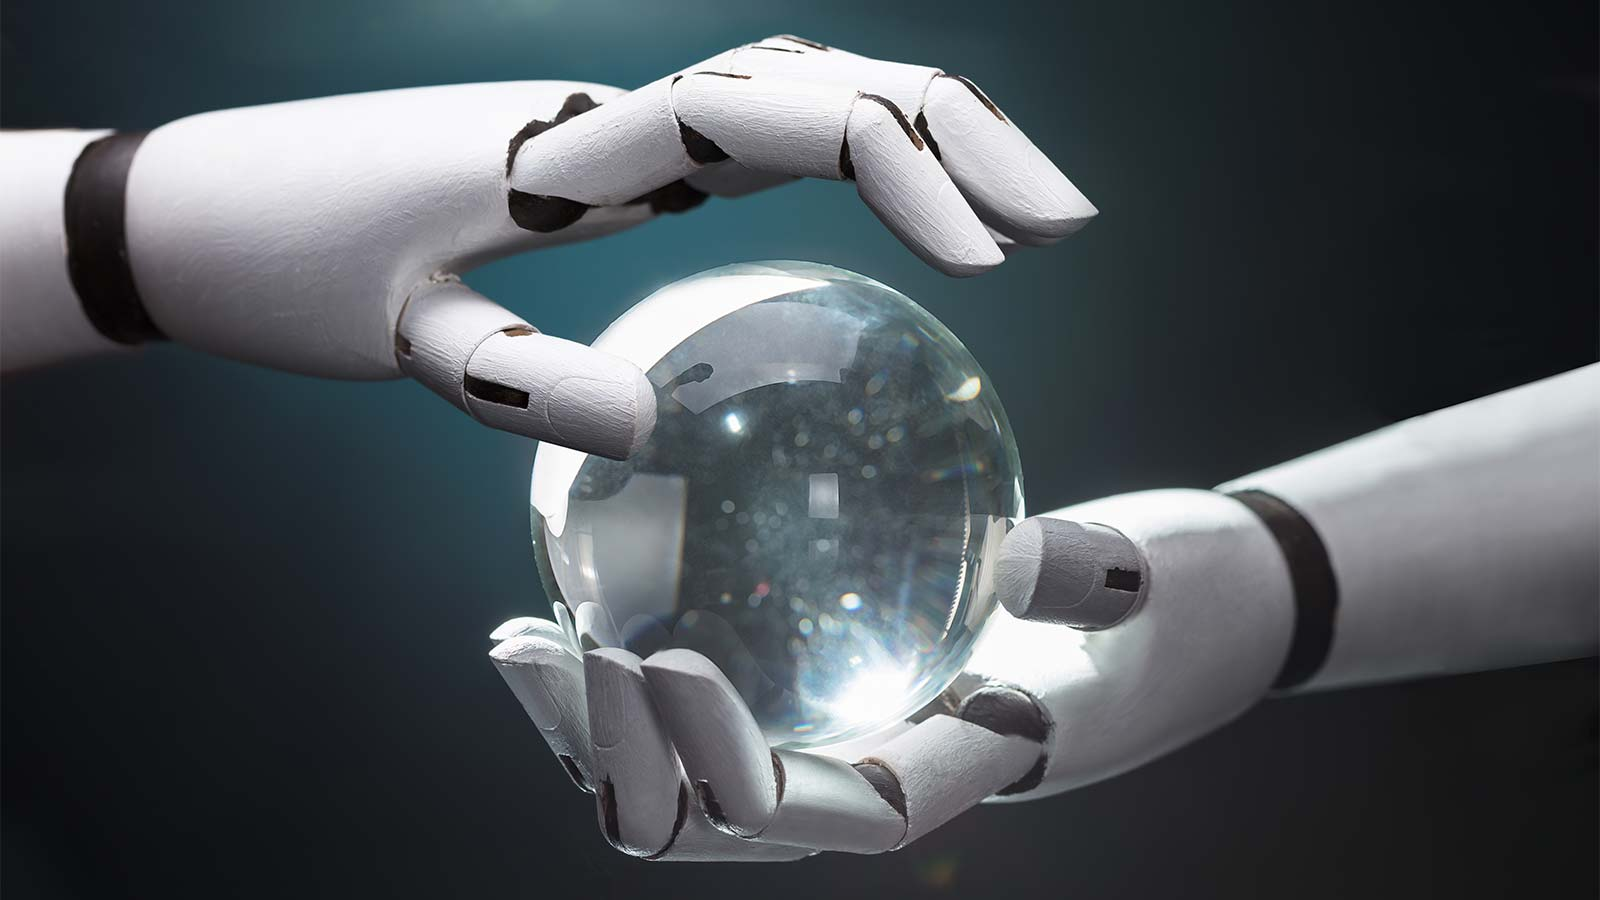

### Prediction

This code snippet creates a pandas Series object containing all the features of a selected customer by removing the "Exited" column from the dataset and selecting a specific row (customer). This can be useful for examining the data of a single customer or making predictions.

Below are the explanations for the code snippet:


- **single_customer = df.drop('Exited', axis=1).iloc[0]**: This line creates a pandas Series named **'single_customer'** that contains all the features of the first row (customer) by removing the "Exited" column.

    - **df.drop('Exited', axis=1)**: This creates a new DataFrame by removing the "Exited" column from the dataset.

    - **.iloc[0]**: This selects the first row (the first customer) from the new DataFrame.

With this code snippet, the pandas Series named **'single_customer'** contains the data for a specific customer. You can use this data to examine it or make predictions for this customer.


In [52]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore                619
Age                         42
Tenure                       2
Balance                  0.000
NumOfProducts                1
HasCrCard                    1
IsActiveMember               1
EstimatedSalary     101348.880
Geography_Germany        False
Geography_Spain          False
Gender_Male              False
Name: 1, dtype: object

In [53]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

As a result, the numpy array named **'single_customer'** is obtained as the scaled version of the selected customer's features. You can use this scaled data to make predictions with the model or for analyses.

In [54]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1]])

In [55]:
df["Exited"].iloc[0]

1

This code snippet allows you to make predictions from a model you trained using the features of a specific customer. The model takes the scaled data, makes predictions, and classifies the results as binary based on a threshold of 0.5.

Below are the explanations for the code snippet:


- **y_pred = (model.predict(single_customer) > 0.5).astype("int32")**: This line allows the model to make a prediction for a specific customer.

    - **model.predict(single_customer)**: The model makes predictions on the scaled data. The prediction results return a series of probabilities.

    - **> 0.5**: Compares the predicted probabilities with the threshold of 0.5. If a predicted probability is greater than 0.5, that prediction is classified as 1.

    - **.astype("int32")**: Converts the results to the **`int32`** data type. This is used to represent the predictions as binary (0 or 1).

As a result, the numpy array named 'y_pred' contains the predictions made by the model for a specific customer. These predictions provide information about the likelihood of that customer churning (leaving).


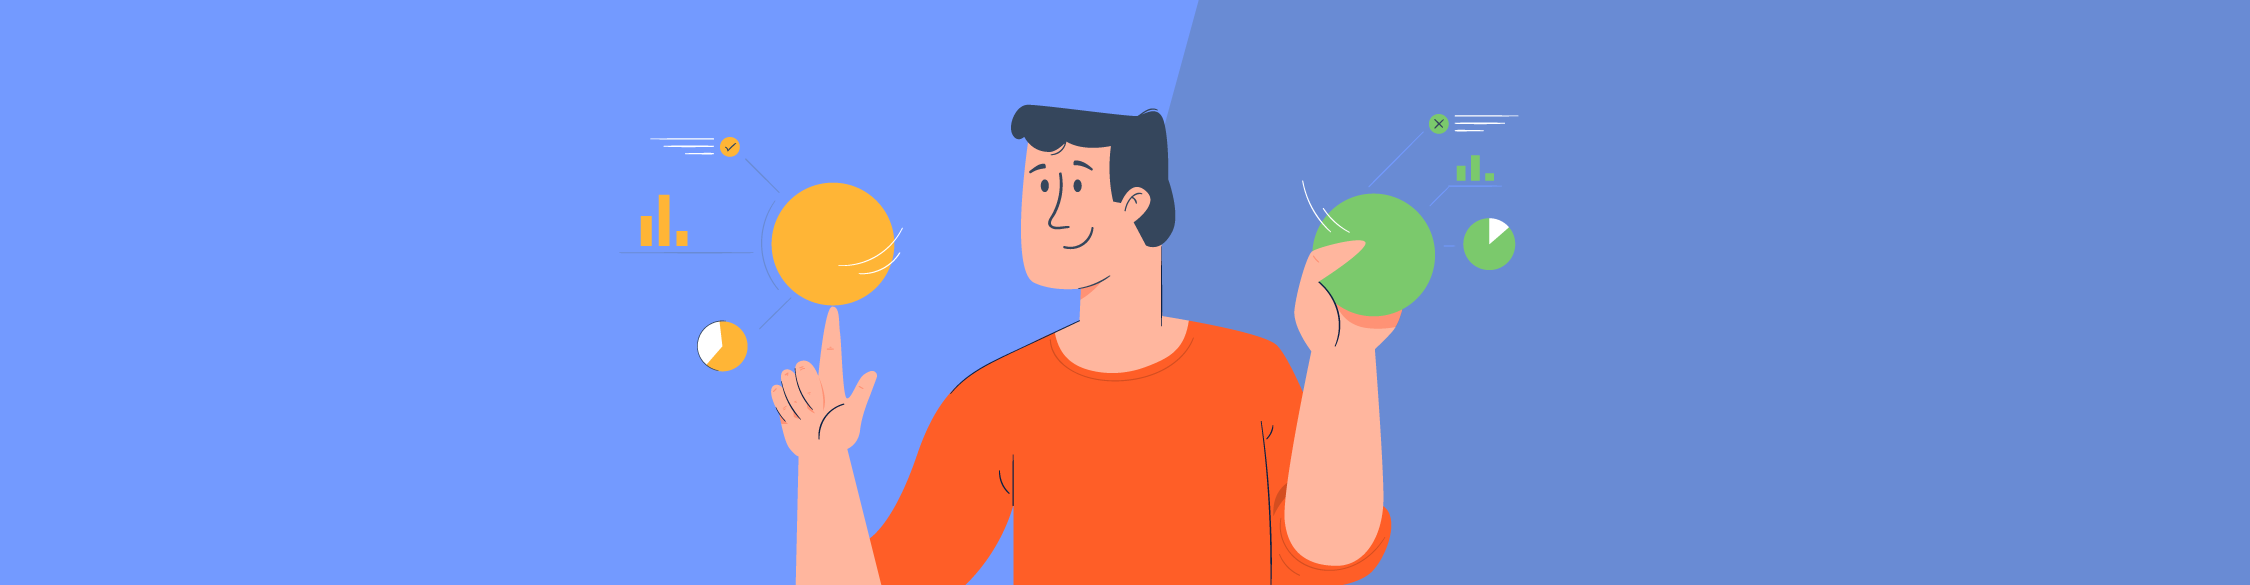

## Comparison with ML

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       796
           1       0.37      0.67      0.47       204

    accuracy                           0.69      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.69      0.72      1000



### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[767  29]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.43      0.54       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



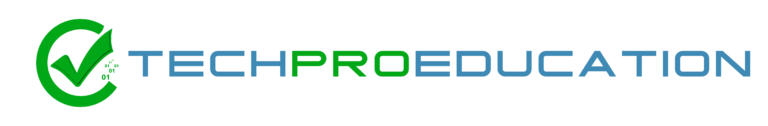